##  개요
- 크롤링이란, 웹페이지에서 필요한 데이터를 추출해내는 작업이며, 크롤링을 하는 프로그램을 크롤러라고 한다. 
- 웹페이지는 정보를 `HTML`로 문서로 표현하는 것을 의미한다. 
- 크롤링을 위해 필요한 것은, 웹페이지의 HTML을 얻기 위해 `requests` 라이브러리를 사용하고, 가져온 `HTML`페이지를 분석하기 위해 `BeautifulSoup`라이브러리를 사용한다. 

## I. BeautifulSoup 라이브러리
- HTML, XML, JSON 등 파일의 구문을 분석하는 모듈을 말하며, 웹페이지를 표현하는 HTML을 분석하기 위해 사용한다.

```python
soup = BeautifulSoup(open("index.html"), "html.parser")
```

- HTML 파일로 BeautifulSoup 객체를 만들 수 있고, 변수 이름은 관습적으로 `soup`라고 짓는다. 

- `html.parser`의 의미는 간단하게 말하면, `HTML을 분석해라`라고 알려주는 의미를 말한다. 

- 주요 함수로는 `find`, `find_all`를 말하는데, 
  + find("p") #  처음 등장하는 태그 찾기
  + find_all("p") # 모든 태그 찾기
- 위 `method`를 이용하여 `HTML 태그`를 추출할 수 있다. 





## II. 소스코드 예제

```python
soup.find("div")
soup.find("div", class_="name_of_class")
```
- `div`는 태그값을 의미하며, `class_`는 매개변수에 값을 저장함으로써 특정 클래스를 가진 태그를 추출할 수 있음

```python
soup.find("div", class_="elice").find("p")
```

- `find`로 얻은 결과도 `BeautifulSoup` 객체이며, 따라서 `find`를 한 결과에 또 `find`를 적용할 수 있다. 
- 위 코드는 `div` 태그 안에 있는 p 태그를 추출한다. 

```python
soup.find("div", class_="elice").find("p").get_text()
```
- `get_text()`를 적용하면 태그가 갖고 있는 텍스트를 얻을 수 있다. 

### 실습 1 HTML 문서 불러오기
주어진 index.html를 불러와 BeautifulSoup 객체로 만들고 출력해보세요. 어떤 HTML 문서로 BeautifulSoup 객체를 만들면, 그 HTML 문서를 BeautifulSoup으로 분석할 수 있습니다.

In [ ]:
from bs4 import BeautifulSoup

# index.html을 불러와서 BeautifulSoup 객체를 초기화해 soup에 저장하세요.
soup = BeautifulSoup(open("index.html"), "html.parser")
print(soup)

### 실습 2. p 태그 내용 출력하기 - 1
주어진 index.html로 BeautifulSoup 객체를 만들었다면, 이제 HTML 문서를 분석해보도록 하겠습니다.
- 해당 HTML 문서에는 p 태그가 있습니다.
- 이 p 태그 부분만을 찾아 출력해보도록 하겠습니다.

In [ ]:
from bs4 import BeautifulSoup

# index.html을 불러와서 BeautifulSoup 객체를 초기화해 soup에 저장하세요.
soup = BeautifulSoup(open("index.html"), "html.parser")

# soup를 사용하여 요구되는 정보를 출력해보세요.
print(soup.find("p").get_text())


### 실습 3. p 태그 내용 출력하기 - 2
- index.html 문서에는 p 태그가 2개 있습니다.
- 두 p 태그 모두 div 태그 안에 둘러싸여 있습니다.
- 하지만 한 p 태그를 둘러싼 div 태그는 class가 cheshire이고, 다른 한 p 태그는 elice입니다.
- 우리는 class가 elice인 div 태그가 감싸고 있는 p 태그의 
텍스트만을 출력하고자 합니다.



```html
<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <title>Crawl This Page</title>
</head>
<body>
  <div class="cheshire">
    <p>Don't crawl this.</p>
  </div>
  <div class="elice">
    <p>Hello, Python Crawling!</p>
  </div>
</body>
</html>
```

In [ ]:
from bs4 import BeautifulSoup

# index.html을 불러와서 BeautifulSoup 객체를 초기화해 soup에 저장하세요.
soup = BeautifulSoup(open("index.html"), "html.parser")

# soup를 사용하여 요구되는 정보를 출력해보세요.
print(soup.find("div", class_="elice").find("p").get_text())

### 실습 4. p 태그 내용 출력하기 - 3
- index.html 문서에는 p 태그가 3개 있습니다.
- 세 p 태그 모두 div 태그 안에 둘러싸여 있습니다.
- 하지만, p 태그를 감싸고 있는 div 태그의 id는 각각 cheshire, elice, main입니다.
- 우리는 id가 main인 div 태그가 감싸고 있는 p 태그의 텍스트만을 출력하고자 합니다.

In [ ]:
from bs4 import BeautifulSoup

# index.html을 불러와서 BeautifulSoup 객체를 초기화해 soup에 저장하세요.
soup = BeautifulSoup(open("index.html"), "html.parser")

# soup를 사용하여 요구되는 정보를 출력해보세요.
print(soup.find("div", id = "main").find("p").get_text())

## III. Requests 라이브러리
- Python에서 HTTP요청을 보낼 수 있는 모듈

### (1) HTTP 요청이란?
- GET 요청: 정보를 `조회`하기 위한 요청
(예: 네이버 홈페이지에 접속한다. 구글에 키워드를 검색한다.)
- POST 요청: 정보를 `생성`, `변경`하기 위한 요청
(예: 웹 사이트에 로그인한다. 메일을 삭제한다.)
- 샘플코드는 아래와 같다. 
```python
url = "https://www.google.com"
result = requests.get(url)
```
- 지정한 URL로 GET요청을 보냈고, 서버에서는 요청을 받아 처리한 후 result 변수에 응답을 보냅니다. 

```python
print(result.status_code)
print(result.text)
```
- 응답의 `status_code`로는 요청의 결과를 알 수 있으며, 성공 했을 경우 `text`로 해당 웹 사이트의 `HTML`을 얻을 수 있다. 


### 실습 5. requests로 웹 페이지 HTML 문서 불러오기
- 지금까지의 실습에서는 미리 준비한 HTML 문서로 작업하였습니다.
- 하지만, 웹 페이지에 있는 정보를 얻기 위해서는 웹 페이지의 HTML 문서를 얻어야 합니다.
- requests 라이브러리를 이용하여 https://www.naver.com 페이지의 HTML 문서를 불러와 출력해보세요.

200

<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네
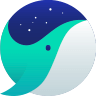
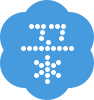

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://www.naver.com"

# url 변수에 담긴 url의 html 문서를 불러와 출력해보세요.
req = requests.get(url)
print(req.status_code)
print(req.text)

### 실습 6. 네이버 헤드 뉴스 찾기

이번 실습에서는 네이버 홈페이지에서 표시되는 헤드라인 뉴스를 전부 크롤링하여 출력해보고자 합니다.

지시사항에 맞추어 코드를 올바르게 작성해주세요.

crawler.py

In [ ]:
import requests
from bs4 import BeautifulSoup

def crawling(soup) :
    # soup 객체에서 추출해야 하는 정보를 찾고 반환하세요.
    result = []
    
    div = soup.find("div", class_="list_issue")
    print(div)
    print("----")

    for a in div.find_all("a"):
      print(a.get_text())
      result.append(a.get_text())

    return result
    
def main() :
    custom_header = {
        'referer' : 'https://www.naver.com/',
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
    }
    
    url = "http://www.naver.com"
    req = requests.get(url, headers = custom_header)
    soup = BeautifulSoup(req.text, "html.parser")

    # crawling 함수의 결과를 출력합니다.
    print(crawling(soup))


if __name__ == "__main__" :
    main()


<div class="list_issue" data-nm-ui="rolling" id="NM_ONELINE_ROLLING"> <div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013131612">민주, 박의장 중재안 수용…검수완박 대치 극적 해소</a></div>
<div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013131525">檢, 박병석 중재안에 "단계적 말살…정치권 수사 막자는 속내"</a></div>
<div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013131293">남북정상 친서…文"대화로 대결 넘어야" 金"노력하면 관계발전"</a></div>
<div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013131520">대통령 취임식 4만명 넘게 초청한다…취임 첫날 현충원 참배<

### 실습 7. 연합뉴스 속보 기사 제목 추출하기
네이버 뉴스 연합뉴스 속보 페이지의 기사 제목을 출력해봅시다.

https://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y

In [ ]:
import requests
from bs4 import BeautifulSoup

def crawling(soup) :
    # soup 객체에서 추출해야 하는 정보를 찾고 반환하세요.
    result = []
    div = soup.find("div", "list_body")
    # 복잡 print(div)
    for a in div.find_all("a"):
      # print(a.get_text())
      result.append(a.get_text())


    return result
    
    


def main() :
    custom_header = {
        'referer' : 'https://www.naver.com/',
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
    }
    
    url = "https://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y"
    req = requests.get(url, headers = custom_header)
    soup = BeautifulSoup(req.text, "html.parser")

    # crawling 함수의 결과를 출력합니다.
    print(crawling(soup))


if __name__ == "__main__" :
    main()


['\n', '미일 정상 "北 비핵화 긴밀 조율 합의"…대중국 공조의지도 천명', '미일회담서 北 무력시위 규탄한 바이든…대북 후속 조치 내놓나', '美 "북, ICBM 시험 발사하며 능력 발전시켜…위협 매우 심각"', '스캐퍼로티 前한미연합사령관 "북 선제공격 대비한 작업했었다"', '이재명, 서울 2030 표심 공략…청년 공약 발표', '윤석열, 세종·충북 필승결의대회…1박2일 중원공략 마무리', '대형지진 예상 지역서 심야 강진…일본 열도 바짝 긴장', '"코로나 시대 불평등의 팬데믹"…지구촌 소득·소비 양극화 심화', '"10년간 소방관 55명 순직…44%가 임용 5년차 이하"', '"벌써 4학년인데"…코로나19에 진로 탐색 난항 겪는 대학생들', "금리공포에 실적부진까지…나스닥, 14일간 14년만에 '최악 출발'", "'독도 그려졌다' 생떼…주한일본대사관, 문대통령 설 선물 반송", '[기후 위기와 해양] ① 파리기후협약 1.5도까지 0.43도밖에 안 남았다']


### 실습 8. bugs 실시간 음원차트 순위 추출하기
bugs 실시간 음원차트의 순위별로 곡명을 담은 리스트를 출력하세요.

https://music.bugs.co.kr/chart

In [ ]:
import requests
from bs4 import BeautifulSoup

def crawling(soup) :
    # soup 객체에서 추출해야 하는 정보를 찾고 반환하세요.
    result = []
    tbody = soup.find("tbody") 
    for p in tbody.find_all("p", class_="title"):
      result.append(p.get_text().replace('\n', ''))

    return result
    
def main() :
    custom_header = {
        'referer' : 'https://music.bugs.co.kr/',
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
    }
    url = "https://music.bugs.co.kr/chart"
    req = requests.get(url, headers = custom_header)
    soup = BeautifulSoup(req.text, "html.parser")

    # crawling 함수의 결과를 출력합니다.
    print(crawling(soup))


if __name__ == "__main__" :
    main()


['DM', '깨우지 마', "Can't Control Myself", '소녀 같은 맘을 가진 그댈 생각하면 아파요', 'Hush Hush', '드라마', 'Love is Around', 'WE GO', '0g', 'Step Back', 'ELEVEN', 'Escape Room', 'Dreams Come True', '여름비', '취중고백', '우리가 헤어져야 했던 이유', '회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)', '이쁘지나 말지', '겨울잠', '서랍', '리무진 (Feat. MINO) (Prod. GRAY)', '사랑은 늘 도망가', 'Counting Stars (Feat. Beenzino)', 'abcdefu', 'Light Switch', 'Christmas Tree', '이별후회', 'SMILEY (Feat. BIBI)', '눈이 오잖아(Feat.헤이즈)', 'Talk & Talk', '정거장', '만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)', '행복하게 해줄게', '흰눈', 'Savage', '다정히 내 이름을 부르면', '신호등', 'Next Level', '꿈이라면', 'strawberry moon', '문득', 'OHAYO MY NIGHT', 'Feel Good (SECRET CODE)', 'STAY', '러브레터', '너를 생각해', '언덕나무', '낙하 (with 아이유)', '그대 손 놓아요', '너무 아픈 사랑은 사랑이 아니었음을', 'Permission to Dance', '불협화음 (Feat. AKMU) (Prod. GRAY)', 'Butter', '오묘해', 'My Universe', '호랑수월가', '아직도 좋아해', 'Still I Love You', 'Dynamite', '사랑이 아니었다고 말하지 마요', 'Celebrity', '너', '그게 더 편할 것 같아 (N번째 연애 X 멜로망스)', 'Bad Habits', '네가 없는 밤 (Feat. ASH

### 실습 9. 영화 후기 수집하기
영화 사이트에 있는 영화평의 제목을 수집해서 출력하는 문제를 실습해봅니다.

사용 URL 주소 : https://movie.naver.com/movie/bi/mi/review.nhn?code=168058#

In [ ]:
import requests
from bs4 import BeautifulSoup

def crawling(soup) :
    # soup 객체에서 추출해야 하는 정보를 찾고 반환하세요.
    ul = soup.find("ul", class_="rvw_list_area")

    result = []

    for li in ul.find_all("li"):
      result.append(li.find("strong").get_text())

    return result
    


def main() :
    custom_header = {
        'referer' : 'https://movie.naver.com/',
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
    }
    url = "https://movie.naver.com/movie/bi/mi/review.nhn?code=168058#"
    req = requests.get(url, headers = custom_header)
    soup = BeautifulSoup(req.text, "html.parser")

    # crawling 함수의 결과를 출력합니다.
    print(crawling(soup))


if __name__ == "__main__" :
    main()


['다들 구라치지마세요 재미1도 없는 영화', '닐 암스트롱 vs 스티븐 시걸', '진짜 영화 제대로 보지도않고, 볼줄도 모르는 사람이 안타깝다', '미국의 성공과 암스트롱의 성공, 그 이면의 이야기', '[영화] 퍼스트맨 (2018), "우주보단 인간, 노래보단 적막, 라라랜드보단 위플래쉬"', '"적막을 감성과 감정으로 채운 영화" 퍼스트맨 짧은리뷰 스포없음', '데미언 셔젤은 왜 ‘닐 암스트롱’을 선택했는가 (in 2018 부산국제영화제)', '<퍼스트맨(First Man , 2018)> 달에 첫 발을 내딛기까지.. 닐 암스트롱의 전기 영화 (데이미언 셔젤 감독, 라이언 고슬링, 클레어 포이, 실화 영화)', '천재감독의 3번째 영화!!!', '정말 많은걸 느끼게 한듯']


## 미션 커뮤니티 댓글 수집하기
커뮤니티 댓글을 수집하여 출력하는 것을 실습해봅니다.

사용 URL 주소 : https://pann.nate.com/talk/350939697

In [ ]:
import requests
from bs4 import BeautifulSoup

def crawling(soup) :
    # soup 객체에서 추출해야 하는 정보를 찾고 반환하세요.
    div = soup.find("div", id="commentDiv")
    result = []

    for dd in div.find_all("dd", class_="usertxt"):
      # print(dd.find("span").get_text().replace("\t", "").replace("\n", ""))
      result.append(dd.find("span").get_text().replace("\t", "").replace("\n", ""))

    return result

def main() :
    custom_header = {
        'referer' : 'https://pann.nate.com/',
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
    }
    url = "https://pann.nate.com/talk/350939697"
    req = requests.get(url, headers = custom_header)
    soup = BeautifulSoup(req.text, "html.parser")

    # crawling 함수의 결과를 출력합니다.
    print(crawling(soup))


if __name__ == "__main__" :
    main()


['우리집도 말티 댕댕이들은 사랑입니당!', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 다이쁨 완전 얼짱이넹', '우리 딸랑이', '말티는 사랑입니당^^', '오우 ses 바다 가 생각나는 헤어사타일이군요', '너무 귀엽당^^', '밑에서 두번째 사진 털때문인지 뾰루퉁한거 넘 귀여워요 ㅋㅋㅋㅋㅋ!울집강아지도 털때문에 가끔 눈이 화난눈 되거든요 ㅎㅎㅎㅎ 귀엽 ㅠ.ㅠ*', '우리집도', '달릴 때 졸귘ㅋㅋ 눈이랑 코랑 동글동글 너무 귀엽 ㅠㅠㅠㅠㅠ', '안녕 칭구', '개똥냄새 쩔게 생겼네', '안녕 난 두부야', '아 너모 이쁘다. 항상 건강하자 아가', '힐링하고 갑니다❤️', '안뇽 ?', '네츄럴 부스스.. 예쁘네요..^^', '으악 싑알 넘귀여워 말티즈 사랑해말티즈최고 말티즈 너무귀엽다', '순백의 청순함에서 깨발랄 ㅋ귀엽네요', '우리 댕댕이ㅋ', '어머나!']
